In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_df = "mouse_data.csv"
clinical_df= "clinical_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_df)
clinical_df = pd.read_csv(clinical_df)

mouse_df.head()
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_df,mouse_df, how="left", on=["Mouse ID", "Mouse ID"])
combined_data.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
drug_group = combined_data.groupby(["Drug", "Timepoint"])
mean_tumor = drug_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mean_tumor})
sem_tumor = drug_group["Tumor Volume (mm3)"].sem()
sem_tumor_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : sem_tumor})

# 1.5 Preview DataFrame
sem_tumor_df.head()

Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                         0.448593
          10                        0.702684
          15                        0.838617
          20                        0.909731

In [12]:
# Minor Data Munging to Re-Format the Data Frames
#mean_tumor_df = mean_tumor_df.reset_index()
#sem_tumor_df = sem_tumor_df.reset_index()
tumor_pivot = pd.pivot_table(mean_tumor_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
tumor_pivot2 = pd.pivot_table(sem_tumor_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
tumor_pivot2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


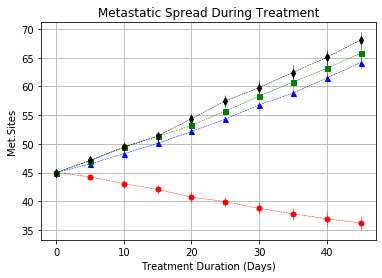

In [14]:
plt.errorbar(tumor_pivot.index, tumor_pivot["Capomulin"], 
             yerr=tumor_pivot2["Capomulin"], color="r", 
             marker="o", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.errorbar(tumor_pivot.index, tumor_pivot["Ceftamin"], 
             yerr=tumor_pivot2["Ceftamin"], color="b", 
             marker="^", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.errorbar(tumor_pivot.index, tumor_pivot["Infubinol"], 
             yerr=tumor_pivot2["Infubinol"], color="g", 
             marker="s", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.errorbar(tumor_pivot.index, tumor_pivot["Placebo"], 
             yerr=tumor_pivot2["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", 
             linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met.Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)

plt.savefig("task2_1.png")

plt.show()




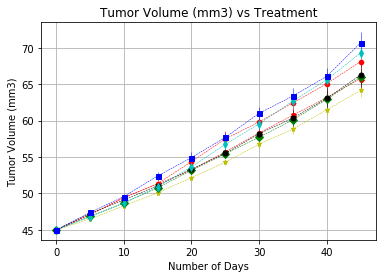

<Figure size 432x288 with 0 Axes>

In [35]:
plt.errorbar(tumor_pivot.index,tumor_pivot["Placebo"],
            yerr=tumor_pivot2["Placebo"],color="r",
            marker="H",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(tumor_pivot.index,tumor_pivot["Ceftamin"],
            yerr=tumor_pivot2["Ceftamin"],color="y",
            marker="*",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(tumor_pivot.index,tumor_pivot["Infubinol"],
            yerr=tumor_pivot2["Infubinol"],color="r",
            marker="X",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(tumor_pivot.index,tumor_pivot["Zoniferol"],
            yerr=tumor_pivot2["Zoniferol"],color="g",
            marker="D",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(tumor_pivot.index,tumor_pivot["Propriva"],
            yerr=tumor_pivot2["Propriva"],color="k",
            marker="o",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(tumor_pivot.index,tumor_pivot["Naftisol"],
            yerr=tumor_pivot2["Naftisol"],color="c",
            marker="d",markersize=5,linestyle="dashed",linewidth=0.50)
plt.errorbar(tumor_pivot.index,tumor_pivot["Ketapril"],
            yerr=tumor_pivot2["Ketapril"],color="b",
            marker="s",markersize=5,linestyle="dashed",linewidth=0.50)

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Number of Days")
plt.grid(True)
plt.title("Tumor Volume (mm3) vs Treatment")
plt.show()

plt.savefig("image_2.png")

In [20]:
metastatic=drug_group["Metastatic Sites"].mean()
metastatic_dtp=pd.DataFrame({"Mean Metastatic Sites":metastatic})

metastatic_se=drug_group["Metastatic Sites"].sem()
metastatic_se_df=pd.DataFrame({"Mean Metastatic Sites":metastatic_se})

metastatic_dtp=metastatic_dtp.reset_index()
metastatic_se_df=metastatic_dtp.reset_index()

pivot_metastatics=pd.pivot_table(metastatic_dtp,values="Mean Metastatic Sites",index="Timepoint",
                        columns="Drug")
pivot_metastatic_sem=pd.pivot_table(metastatic_dtp,values="Mean Metastatic Sites",index="Timepoint",
                        columns="Drug")

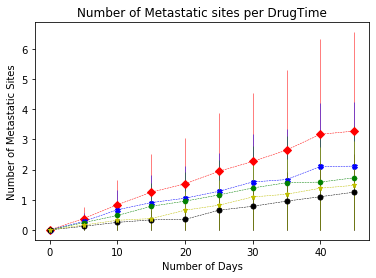

<Figure size 432x288 with 0 Axes>

In [25]:
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Placebo"],
         yerr=pivot_metastatic_sem["Placebo"], color="r",
         marker="D",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Infubinol"],
         yerr=pivot_metastatic_sem["Infubinol"], color="b",
         marker="X",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Stelasyn"],
         yerr=pivot_metastatic_sem["Stelasyn"], color="g",
         marker="H",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Ramicane"],
         yerr=pivot_metastatic_sem["Ramicane"], color="k",
         marker="o",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Capomulin"],
         yerr=pivot_metastatic_sem["Capomulin"], color="y",
         marker="*",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.ylabel("Number of Metastatic Sites")
plt.xlabel("Number of Days")
plt.title("Number of Metastatic sites per DrugTime")
plt.show()

plt.savefig("image_3.png")

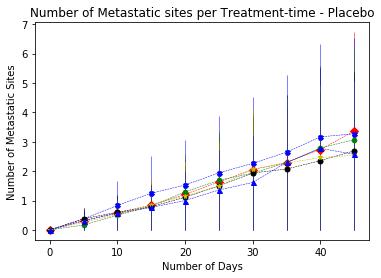

In [29]:
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Ketapril"],
         yerr=pivot_metastatic_sem["Ketapril"], color="r",
         marker="D",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Placebo"],
         yerr=pivot_metastatic_sem["Placebo"], color="b",
         marker="X",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Zoniferol"],
         yerr=pivot_metastatic_sem["Zoniferol"], color="g",
         marker="H",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Ceftamin"],
         yerr=pivot_metastatic_sem["Ceftamin"], color="k",
         marker="o",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Naftisol"],
         yerr=pivot_metastatic_sem["Naftisol"], color="y",
         marker="*",markersize=5,linestyle="dashed",
         linewidth=0.50)
plt.errorbar(pivot_metastatics.index,pivot_metastatics["Propriva"],
         yerr=pivot_metastatic_sem["Propriva"], color="b",
         marker="^",markersize=5,linestyle="dashed",
         linewidth=0.50)

plt.title("Number of Metastatic sites per Treatment-time - Placebo")
plt.ylabel("Number of Metastatic Sites")
plt.xlabel("Number of Days")
plt.savefig("image_4.png")

plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

In [31]:
mouse_count=drug_group["Mouse ID"].count()
mouse_count_df=pd.DataFrame({"Mouse Count":mouse_count})
mouse_count_df=mouse_count_df.reset_index()
mouse_count_df=mouse_count_df.pivot(index="Timepoint",columns="Drug")["Mouse Count"]

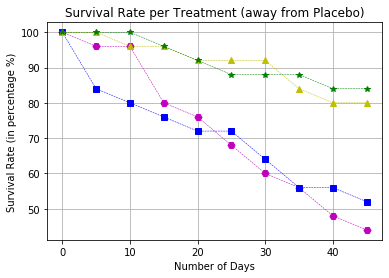

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(100 * mouse_count_df["Placebo"] / 25, "mH", 
         linestyle="dashed", markersize=7, linewidth=0.50)
plt.plot(100 * mouse_count_df["Ceftamin"] / 25, "bs", 
         linestyle="dashed", markersize=6, linewidth=0.50)
plt.plot(100 * mouse_count_df["Ramicane"] / 25, "y^", 
         linestyle="dashed", markersize=6, linewidth=0.50)
plt.plot(100 * mouse_count_df["Capomulin"] / 25 , "g*", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival Rate per Treatment (away from Placebo)")
plt.ylabel("Survival Rate (in percentage %)")
plt.xlabel("Number of Days")
plt.grid(True)
plt.show()

plt.savefig("image_5.png")

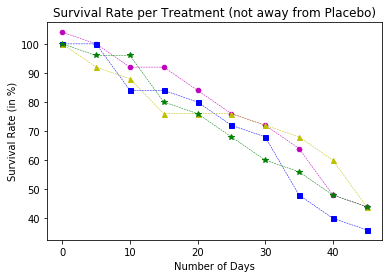

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(100 * mouse_count_df["Stelasyn"] / 25, "mH", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_df["Infubinol"] / 25, "bs", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_df["Ketapril"] / 25, "y^", 
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_count_df["Placebo"] / 25 , "g*", 
         linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival Rate per Treatment (not away from Placebo)")
plt.ylabel("Survival Rate (in %)")
plt.xlabel("Number of Days")
plt.show()

plt.savefig("image_6.png")

In [39]:
tumor_pchange= 100 * (tumor_pivot.iloc[-1]- tumor_pivot.iloc[0]) /tumor_pivot.iloc[0]
                        
tumor_pchange_sem =  100 * (tumor_pivot2.iloc[-1] - tumor_pivot2.iloc[0]) / tumor_pivot2.iloc[0]
tumor_pchange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

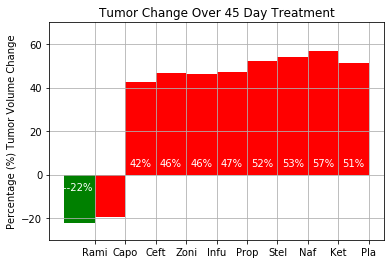

In [40]:
percentage_changes = (tumor_pchange["Ramicane"], tumor_pchange["Capomulin"], tumor_pchange["Ceftamin"], 
               tumor_pchange["Zoniferol"], tumor_pchange["Infubinol"], tumor_pchange["Propriva"],
               tumor_pchange["Stelasyn"], tumor_pchange["Naftisol"], tumor_pchange["Ketapril"], 
               tumor_pchange["Placebo"])

fig, ax = plt.subplots()
ind = np.arange(len(percentage_changes))  
width = 1
rectsPass = ax.bar(ind[0], percentage_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:], percentage_changes[1:], width, color="red")

ax.set_ylabel("Percentage (%) Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Rami", "Capo", "Ceft", "Zoni", "Infu", "Prop", "Stel", "Naf", "Ket", "Pla"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
autolabelPass(rectsPass)
autolabelFail(rectsFail)

fig.show()
